In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
'''Question 4(1)
Detailed Report: 
1. Firstly the image is read by using the function 'imread', only one channel is considered as our question contains
grayscale image.
2. Then Fast Fourier Transform is applied on the image by using the function of numpy 'fft2', which changes the original image
in spatial domain to the frequrency domain, thus contains freqency specturm of the original image. This frequency spectrum consists
of weighted sum of 2D orthogonal Basis function.
3. Since all the Basis elements have the pairs thus providing the average as 0, but we have DC Component or Zero Coefficient
which lies in the top left corner of the frequecny domain obtained from step 2. So its shifted to the center of the image by using
function 'fftshift'.
4. Now its easy to visualize spectrum coefficients in log magnitude spectrum beaucse it stretches the distribution of the 
intensity, thus easy to find the main frequencies.
'''

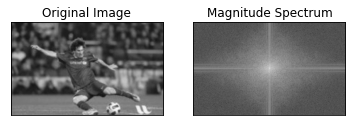

False

In [4]:
img = cv2.imread('image05.png',0)
freq_spec = np.fft.fft2(img)
freq_spec_shift = np.fft.fftshift(freq_spec)
mag_spec = 20*np.log(np.abs(freq_spec_shift))

plt.subplot(121), plt.imshow(img,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.subplot(122), plt.imshow(mag_spec, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('Magnitude Spectrum')
plt.show()

cv2.imwrite('/TUK/Courses/Sem 2/2D IP/Excercise/1/SHARED 2DIP 2020/Solution/Assingnment 1/Question 4/Original.png', img)
cv2.imwrite('/TUK/Courses/Sem 2/2D IP/Excercise/1/SHARED 2DIP 2020/Solution/Assingnment 1/Question 4/Mag_spec.png', mag_spec)

In [ ]:
'''
Question 4(2)
Detailed Report:
1. From the above Magnitude spectrum, we can see that minimum frequencies are present at the center of the image 
(horizontally and vertically), thus we have set the middle part of the image frequencies to 0 by considering the window of (60*60)
take from the center to the image.
2. Thus the low frequencies have been removed from the image and then inverse shift is applied to keep DC component bac in top left 
corner by using 'ifftshift' function
3. Inverse discrete FFT is applied and image in spatial doamin is returned using numpy function 'ifft2'.
4. By removing the low frequencies we get the final image which has all the details, it is generally used for edge detection.
'''

True

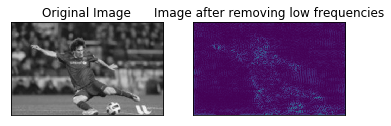

In [63]:
rows, cols = img.shape
center_row = round(rows/2)
center_col = round(cols/2)

freq_spec_shift[center_row-30:center_row+30, center_col-30:center_col+30] = 0
inv_fshift = np.fft.ifftshift(freq_spec_shift)
img_spatial = np.fft.ifft2(inv_fshift)
abs_img = np.abs(img_spatial)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.subplot(122), plt.imshow(abs_img), plt.xticks([]), plt.yticks([])
plt.title('Image after removing low frequencies')

cv2.imwrite('/TUK/Courses/Sem 2/2D IP/Excercise/1/SHARED 2DIP 2020/Solution/Assingnment 1/Question 4/abs_img.png', abs_img)

In [ ]:
'''
Question 4(3)
Detailed Report:
1. The image is transformed to frequency domain by using opencv function 'dft', that is discrete fourier transform is done on
the original image.
2. The DC Component shift is done by using numpy function 'fftshift'
3. To remove high frequencies we have generated a mask, which contains value 1 at low frequency region which allows low frequencies
to exists and 0 value at high frequency region. Thus, we have kept low frequencies and removed the high frequencies.
4. Then inverse shift is applied to keep DC component bac in top left corner by using 'ifftshift' function
5. Inverse discrete FFT is applied and image in spatial doamin is returned using opencv function 'idft'
6. The magnitude of the two different real and complex part are merged to make the vector by using the function 'magnitude' and the
filtered image is plotted back.
'''

True

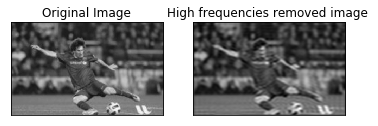

In [65]:
freq_domain_img = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
freq_domain_img_shift = np.fft.fftshift(freq_domain_img)

mask = np.zeros((rows,cols,2))
mask[center_row-30:center_row+30, center_col-30:center_col+30] = 1

freq_domain_img_shift_mask = freq_domain_img_shift*mask
freq_domain_img_invshift = np.fft.ifftshift(freq_domain_img_shift_mask)
img_spatial = cv2.idft(freq_domain_img_invshift)
filtered_img = cv2.magnitude(img_spatial[:,:,0],img_spatial[:,:,1])

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.subplot(122), plt.imshow(filtered_img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('High frequencies removed image ')

cv2.imwrite('/TUK/Courses/Sem 2/2D IP/Excercise/1/SHARED 2DIP 2020/Solution/Assingnment 1/Question 4/filter_img.png', filtered_img)